number of accepted samples = 18171


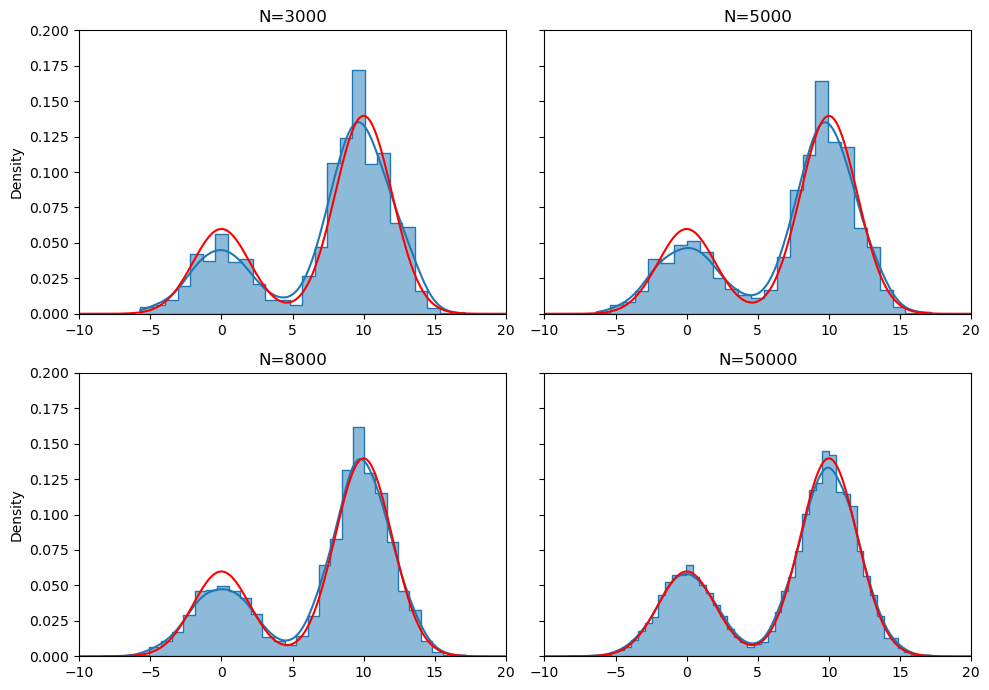

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from functools import partial
import seaborn as sns

# Define the target distribution (Gaussian Mixture Model)
def gaussian(x, mu, sigma):
    factor = 1 / (sigma * np.sqrt(2 * np.pi))
    return factor * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def target(x):
    return 0.3 * norm.pdf(x, 0, 2) + 0.7 * norm.pdf(x, 10, 2)

def proposal(mu, sigma):
    return mu + sigma * np.random.randn()

def proposal_conditional(x, y, sigma_prop):
    return gaussian(x=x, mu=y, sigma=sigma_prop)



# Metropolis-Hastings algorithm
def MH(target, proposal, proposal_conditional, n_iterations: int):
    samples = []
    n_accepted = 0

    # initial state
    x = np.random.rand()
    proposal_old = target(x)

    for i in range(n_iterations):
        xprime = proposal(x)    
        proposal_new = target(xprime) # P(x')
        alpha = proposal_new / (proposal_old + np.finfo(float).eps) # P(x') / P(x)
        alpha *= proposal_conditional(x, xprime) / proposal_conditional(xprime, x) # q(x|x’), q(x'|x)
        alpha = min(1, alpha)
        # Acceptance probability A “accepts” the proposed value x'
        # otherwise rejects it by keeping the current value x
        
        if np.random.rand() <= alpha:
            x = xprime
            proposal_old = proposal_new
            n_accepted += 1

        if i > 2000: # Burn-in period
            samples.append(x)

    return samples, n_accepted

# Parameters
n_iterations = 50000
np.random.seed(42)
sigma_prop = 10
mu_prop = 3

target_fn = partial(target)
proposal_fn = partial(proposal, sigma=sigma_prop)
proposal_conditional_fn = partial(proposal_conditional, sigma_prop = sigma_prop)

# Generate samples using Metropolis-Hastings
x, naccept = MH(
    target=target_fn,
    proposal=proposal_fn,
    proposal_conditional=proposal_conditional_fn,
    n_iterations=n_iterations,
)

Ns = [3000, 5000, 8000, n_iterations]
print(f"number of accepted samples = {naccept}")

x_t = np.linspace(-10, 20, 1000)
gauss = target_fn(x_t)

fig, axes = plt.subplots(2, 2, figsize=(10, 7), sharey=True)
for i, ax in enumerate(fig.axes):
    ax.set_title(f"N={Ns[i]}")
    sns.histplot(ax=ax, data=x[: Ns[i]], element="step", kde=True, stat="density")
    ax.plot(x_t, gauss, color="r")
    ax.axis([-10, 20, 0, 0.2])

plt.tight_layout()
plt.savefig("img\mcmc.jpg")
plt.show()

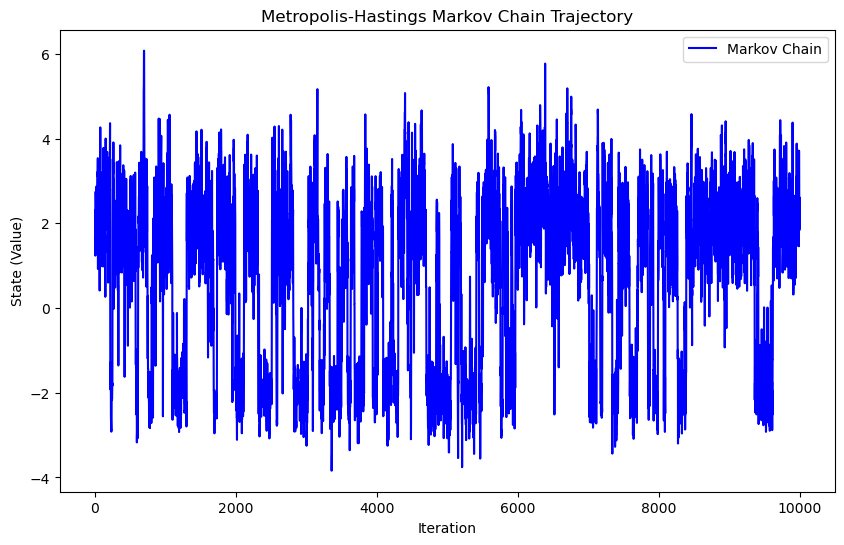

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(samples, 'b-', label="Markov Chain")
plt.title("Metropolis-Hastings Markov Chain Trajectory")
plt.xlabel("Iteration")
plt.ylabel("State (Value)")
plt.legend()
plt.show()